# 以相似度为训练目标

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## 训练数据生成器

In [2]:
!git clone https://github.com/daibiaoxuwu/05wan11_11
!git clone https://github.com/daibiaoxuwu/05wan11b2
#!git clone https://github.com/daibiaoxuwu/05wan12
#!git clone https://github.com/daibiaoxuwu/05wan12b
!git clone https://github.com/daibiaoxuwu/05wan13
!git clone https://github.com/daibiaoxuwu/05wan13b3
!git clone https://github.com/daibiaoxuwu/05wan14
!git clone https://github.com/daibiaoxuwu/05wan14b2
!git clone https://github.com/daibiaoxuwu/3181
!git clone https://github.com/daibiaoxuwu/3181bb
!git clone https://github.com/daibiaoxuwu/3182
!git clone https://github.com/daibiaoxuwu/3182b
!git clone https://github.com/daibiaoxuwu/317
!git clone https://github.com/daibiaoxuwu/317b1

Cloning into '05wan11_11'...
remote: Enumerating objects: 30512, done.
remote: Counting objects: 100% (30512/30512), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 30512 (delta 30504), reused 30512 (delta 30504), pack-reused 0
Receiving objects: 100% (30512/30512), 9.61 MiB | 32.35 MiB/s, done.
Resolving deltas: 100% (30504/30504), done.
Cloning into '05wan11b2'...
remote: Enumerating objects: 183, done.
remote: Counting objects: 100% (183/183), done.
remote: Compressing objects: 100% (183/183), done.
remote: Total 183 (delta 0), reused 183 (delta 0), pack-reused 0
Receiving objects: 100% (183/183), 859.93 KiB | 6.82 MiB/s, done.
Cloning into '05wan13'...
remote: Enumerating objects: 40909, done.
remote: Counting objects: 100% (40909/40909), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 40909 (delta 40900), reused 40909 (delta 40900), pack-reused 0
Receiving objects: 100% (40909/40909), 8.82 MiB | 32.71 MiB/s, done.
Resolving deltas: 100% (40900

In [0]:
import os
import cv2
import numpy as np
import random
from matplotlib import pyplot as plt

datasizex = 9
datasizey = 9

picnum = 30
lowpercent = 125.0
highpercent = 233.0
enhance = 4
def read_data(path1,path2,picsizex,picsizey):

  x_train0 = []
  y_train0 = dict()
  idxes = dict()

  #read clock
  #read and /255
  for filename in os.listdir(path2):
      if 'git' in filename: continue
      ans = cv2.imread(os.path.join(path2,filename),cv2.IMREAD_GRAYSCALE).astype('float32')     
      ans = np.clip((ans-lowpercent)/(highpercent - lowpercent),0,1)
      y_train0[int(filename[:-4])]=ans

  keys = list(y_train0.keys())
  
  #read data
  #add an axis and /255
  
  filelist = os.listdir(path1)
  random.shuffle(filelist)
  index = 0
  for filename in filelist:
      if 'git' in filename or 'c.jpg' in filename: continue
      ftime = int(filename.split('_')[0])
      value = max(filter(lambda t:t<ftime,keys))
      if(abs(ftime-value)<10000):continue

      x_train0.append(cv2.imread(os.path.join(path1,filename)).astype('float32')/255.0)
      if value not in idxes:idxes[value]=[index]
      else: idxes[value].append(index)
      index += 1

  #index data
  print(len(x_train0),index,len(y_train0),len(idxes.keys()))
  lens = [len(i) for i in idxes.values()]
  print(min(lens),max(lens),np.average(lens))
  for key,val in list(idxes.items()):
    if len(val)<picnum:
      idxes.pop(key)
  

  #generator
  def data_generator(ikeys_t):
    while True:
      
      dataout = []

      '''
      while True:
        key = random.choice(ikeys_t)
        idx2 = random.sample(idxes[key],picnum)
        posx = random.randint(0,picsizex-datasizex)
        posy = random.randint(0,picsizey-datasizey)
        pic = x_train0[idx2[i]][posx:posx+datasizex,posy:posy+datasizey,:]
        if(np.sum(pic) < 175):
          for i in range(picnum):
            dataout[i].append(x_train0[idx2[i]][posx:posx+datasizex,posy:posy+datasizey,:])
          ansout.append(y_train0[key][posx:posx+datasizex,posy:posy+datasizey])
          break
      '''
      key = random.choice(ikeys_t)
      idx2 = random.sample(idxes[key],picnum)
      posx = random.randint(0,picsizex-datasizex)
      posy = random.randint(0,picsizey-datasizey)
    
      for i in range(picnum):
        dataout.append(x_train0[idx2[i]][posx:posx+datasizex,posy:posy+datasizey,:])
      ansout = y_train0[key][posx*enhance:(posx+datasizex)*enhance,posy*enhance:(posy+datasizey)*enhance]
      yield dataout,ansout
      
  def pic_generator(ikeys_t):
    while True:
      key = random.choice(ikeys_t)
      idx2 = random.sample(idxes[key],picnum)
      data=[x_train0[i] for i in idx2]
      ans=y_train0[key]
      yield data,ans

  #split
  ikeys = list(idxes.keys())
  random.shuffle(ikeys)
  ltrain = int(len(ikeys)*0.8)  
  train_generator = data_generator(ikeys[:ltrain])
  test_generator = data_generator(ikeys[ltrain:])
  train_pic_generator = pic_generator(ikeys[:ltrain])
  test_pic_generator = pic_generator(ikeys[ltrain:])

  return train_generator,test_generator,train_pic_generator,test_pic_generator



In [0]:

from matplotlib import pyplot as plt
picsizex = 18
picsizey = 38
train_generators = [0,0,0,0,0,0]
test_generators = [0,0,0,0,0,0]
train_pic_generators = [0,0,0,0,0,0]
test_pic_generators = [0,0,0,0,0,0]
train_generators[0],test_generators[0],train_pic_generators[0],test_pic_generators[0] = read_data('05wan11_11','05wan11b2',18,38)
train_generators[1],test_generators[1],train_pic_generators[1],test_pic_generators[1] = read_data('05wan13','05wan13b3',14,31)
train_generators[2],test_generators[2],train_pic_generators[2],test_pic_generators[2] = read_data('05wan14','05wan14b2',14,31)
train_generators[3],test_generators[3],train_pic_generators[3],test_pic_generators[3] = read_data('317','317b1',10,47)
train_generators[4],test_generators[4],train_pic_generators[4],test_pic_generators[4] = read_data('3181','3181bb',10,47)
train_generators[5],test_generators[5],train_pic_generators[5],test_pic_generators[5] = read_data('3182','3182b',10,47)

def stack_generator(generators):
  while True:
    dataout = []
    for i in range(picnum):dataout.append([])
    ansout = []
    for train2 in range(32):
      data,ans=next(generators[random.randint(0,5)])
      for i in range(picnum):
        dataout[i].append(data[i])
      ansout.append(ans)
    yield [np.stack(data2) for data2 in dataout],np.stack(ansout)

train_generator = stack_generator(train_generators)
test_generator = stack_generator(test_generators)
data,ans = next(test_generator)
for pics in data:
  for i in range(6):
    plt.subplot(231+i)
    plt.imshow(pics[i,:,:,0],cmap='gray')

27456 27456 181 138
79 207 198.95652173913044
36839 36839 608 190
87 202 193.88947368421051
63590 63590 343 335
27 204 189.82089552238807
48374 48374 435 278
14 188 174.0071942446043


In [0]:
ans[0,0,0]=0
ans[0,1,0]=1
plt.imshow(ans[0],cmap='gray')
print(np.sum(ans[0]))
print(np.min(ans[0]),np.max(ans[0]))

# 数据初始化完成。


# 装载Tensorflow

In [0]:

from __future__ import absolute_import, division, print_function, unicode_literals

# 安装 TensorFlow
try:
  # Colab only
  %tensorflow_version 2.x
except Exception:
    pass

import tensorflow as tf


# 搭建模型和训练
现在的网络去掉dropout则可以拟合10张图片，
但是加上dropout就拟合不了。
从7张拟合5张的，则可以在两个epoch（每个epoch抽取60000次）内到80%。

继续训练20张，一个epoch就到60%。

In [6]:
inputs = [tf.keras.layers.Input(shape=(datasizex,datasizey,3))  for i in range(picnum)]
#inputs = tf.keras.layers.Input(shape=(5,12,12,1))
convg1 = 0
convd1 = 0
convh1 = inputs
inputs_big = inputs
for layernum in range(9):
  conv_a1 = tf.keras.layers.Conv2D(32, (3, 3), padding = 'Same',  activation='relu')
  conva1 = [conv_a1(convh1[i]) for i in range(picnum)]
  #drop_a1 = tf.keras.layers.Dropout(0.2)
  #conva1 = drop_a1(conva1)
  conv_b1 = tf.keras.layers.Conv2D(32, (3, 3), padding = 'Same',  activation='relu')
  convb1 = [conv_b1(conva1[i]) for i in range(picnum)]
  

  conv_c1 = tf.keras.layers.Conv2D(32, (3, 3), padding = 'Same',  activation='relu')
  convc1 = [conv_c1(inputs_big[i]) for i in range(picnum)]
  #drop_b1 = tf.keras.layers.Dropout(0.2)
  #convc1 = drop_a1(convc1)
  conv_d1 = tf.keras.layers.Conv2D(32, (3, 3), padding = 'Same',  activation='relu')
  convd1 = [conv_d1(convc1[i]) for i in range(picnum)]
  

  convs1 = tf.stack(convb1)
  convf1 = [
      tf.math.reduce_max(convs1, axis=[0]),
      tf.math.reduce_mean(convs1, axis=[0]),
      tf.math.reduce_min(convs1, axis=[0]),
  ]

  conv_g1 = tf.keras.layers.Conv2D(32, (3, 3), padding = 'Same',  activation='relu')
  convg1 = [conv_g1(convf1[i]) for i in range(3)]

  drop_c1 = tf.keras.layers.Dropout(0.2)
  convh1 = [drop_c1(tf.concat(convg1+[convd1[i]],axis=3)) for i in range(picnum)]
  if(layernum % 3 == 1):
    convex1 = tf.keras.layers.Conv2D(32, (1, 1), padding = 'Same',  activation='relu')
    convh1 = [tf.keras.layers.UpSampling2D(size=(2, 2), data_format=None)(i) for i in convh1]
    convh1 = [convex1(convh1[i]) for i in range(picnum)]
    inputs_big = [tf.keras.layers.UpSampling2D(size=(2, 2), data_format=None)(i) for i in inputs_big]
convh3 = tf.concat(convg1+convd1,axis=3)

convx1 = tf.keras.layers.Conv2D(64, (3, 3), padding = 'Same',  activation='relu')(convh3)
convx2 = tf.keras.layers.Dropout(0.2)(convx1)
convx3 = tf.keras.layers.Conv2D(64, (3, 3), padding = 'Same', activation='relu')(convx2)
'''
convx3 = tf.keras.layers.Flatten()(convx2)

#keep_prob = tf.placeholder(tf.float32) # dropout (keep probability)
convx4 = tf.keras.layers.Dropout(0.2)(convx3)

convy1 = tf.keras.layers.Dense(21*45)(convx4)
#convy3 = tf.keras.layers.Dense(10,activation='softmax')(convy1)
convy4 = tf.keras.layers.Reshape([21,45])(convy1)
'''

convx4 = tf.keras.layers.Conv2D(1, (3, 3), padding = 'Same')(convx3)

model = tf.keras.Model(inputs=inputs, outputs=convx4)


NameError: ignored

In [0]:
#tf.reduce_mean(tf.image.ssim(reconstructed, truth, 1.0))
model.compile(optimizer='adam',#tf.keras.optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0),
                #loss=lambda y_pred,y_true:1-tf.reduce_mean(tf.image.ssim_multiscale(tf.clip_by_value(y_pred,0,1), y_true, 255))#-tf.reduce_mean(tf.image.psnr(tf.clip_by_value(y_pred,0,1), y_true, 1.0))
              loss='mse',
              metrics=['mse']
              )
            
#model.summary()

# 测试正确率：

In [0]:
from skimage.metrics import peak_signal_noise_ratio,structural_similarity, mean_squared_error
class show_accuracy(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if epoch % 5 == 1:
      data,ans = next(test_generator)
      data = [data[x][5][np.newaxis,:,:,:] for x in range(picnum)]
      ans = ans[5]
      import matplotlib
      cmap = matplotlib.cm.gray 
      cmap.set_bad(color='black')

      pred = model.predict(data) #shape:(1,11,11,1) because last layer is conv not dense
      #pred = np.clip(pred,0,1)
      #pred = (pred-np.min(pred))/(np.max(pred)-np.min(pred))
      #pred = softmax(pred)
      pred[0,0,0,0]=0
      pred[0,-1,-1,0]=1
      ans[0,0]=0
      ans[-1,-1]=1
      for i in range(6):
        plt.subplot(231+i)
        plt.imshow(data[i][0,:,:,0],cmap=cmap)
      plt.show()
      plt.subplot(121)
      plt.imshow(pred[0,:,:,0],cmap=cmap)
      plt.colorbar()
      #ans = np.clip((ans-np.percentile(ans,10))/(np.percentile(ans,90)-np.percentile(ans,10)),0,1)
      plt.subplot(122)
      plt.imshow(ans,cmap=cmap)
      plt.colorbar()
      plt.show()
#      print('psnr',peak_signal_noise_ratio(np.clip(pred[0,:,:,0],0,1),ans))
#      print('ssim',structural_similarity(np.clip(pred[0,:,:,0],0,1),ans))
      print('mse',mean_squared_error(np.clip(pred[0,:,:,0],0,1),ans))



# 开始训练

In [0]:
#!cp -r "/content/drive/My Drive/checkpoints/training_15/" "/content/drive/My Drive/checkpoints/training_15_archive2"

In [0]:
# Suppress some level of logs
import logging
logging.getLogger("tensorflow").setLevel(logging.WARN)

In [0]:
#!ls "/content/drive/My Drive/checkpoints"
model.load_weights(tf.train.latest_checkpoint("/content/drive/My Drive/checkpoints/training_16/"))#,by_name=True)

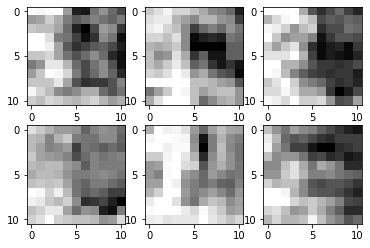

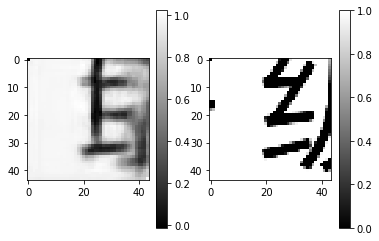

mse 0.0913676691218601
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 500 steps, validate for 50 steps
Epoch 1/200
500/500 - 327s - loss: 0.1381 - mse: 0.1381 - val_loss: 0.1386 - val_mse: 0.1386
Epoch 2/200


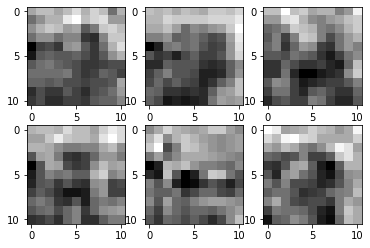

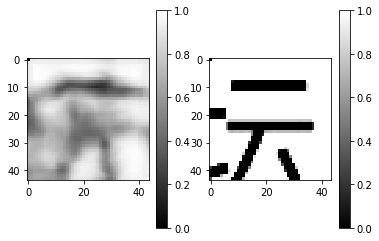

mse 0.11077766504397477
500/500 - 299s - loss: 0.1326 - mse: 0.1326 - val_loss: 0.1351 - val_mse: 0.1351
Epoch 3/200
500/500 - 298s - loss: 0.1310 - mse: 0.1310 - val_loss: 0.1328 - val_mse: 0.1328
Epoch 4/200
500/500 - 298s - loss: 0.1304 - mse: 0.1304 - val_loss: 0.1329 - val_mse: 0.1329
Epoch 5/200
500/500 - 298s - loss: 0.1299 - mse: 0.1299 - val_loss: 0.1378 - val_mse: 0.1378
Epoch 6/200
500/500 - 298s - loss: 0.1287 - mse: 0.1287 - val_loss: 0.1363 - val_mse: 0.1363
Epoch 7/200


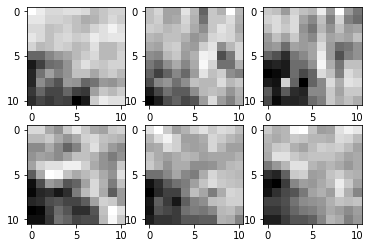

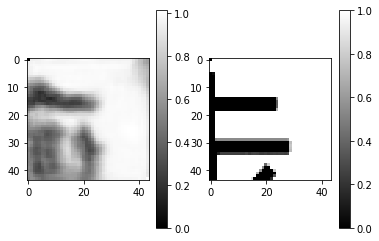

mse 0.09499061322847725
500/500 - 299s - loss: 0.1282 - mse: 0.1282 - val_loss: 0.1337 - val_mse: 0.1337
Epoch 8/200
500/500 - 298s - loss: 0.1271 - mse: 0.1271 - val_loss: 0.1387 - val_mse: 0.1387
Epoch 9/200
500/500 - 297s - loss: 0.1275 - mse: 0.1275 - val_loss: 0.1337 - val_mse: 0.1337
Epoch 10/200
500/500 - 297s - loss: 0.1265 - mse: 0.1265 - val_loss: 0.1321 - val_mse: 0.1321
Epoch 11/200
500/500 - 297s - loss: 0.1267 - mse: 0.1267 - val_loss: 0.1312 - val_mse: 0.1312
Epoch 12/200


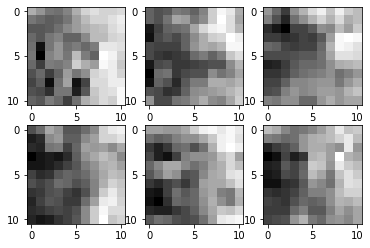

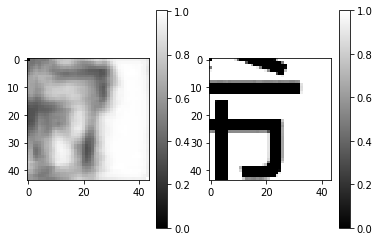

mse 0.1567528540235028
500/500 - 298s - loss: 0.1267 - mse: 0.1267 - val_loss: 0.1323 - val_mse: 0.1323
Epoch 13/200
500/500 - 297s - loss: 0.1260 - mse: 0.1260 - val_loss: 0.1303 - val_mse: 0.1303
Epoch 14/200
500/500 - 297s - loss: 0.1253 - mse: 0.1253 - val_loss: 0.1331 - val_mse: 0.1331
Epoch 15/200
500/500 - 297s - loss: 0.1259 - mse: 0.1259 - val_loss: 0.1315 - val_mse: 0.1315
Epoch 16/200
500/500 - 297s - loss: 0.1245 - mse: 0.1245 - val_loss: 0.1312 - val_mse: 0.1312
Epoch 17/200


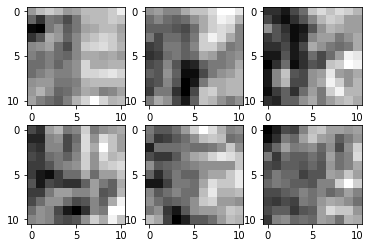

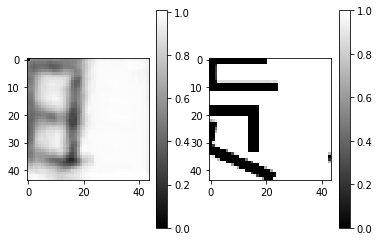

mse 0.10622253155253976
500/500 - 298s - loss: 0.1245 - mse: 0.1245 - val_loss: 0.1341 - val_mse: 0.1341
Epoch 18/200
500/500 - 297s - loss: 0.1240 - mse: 0.1240 - val_loss: 0.1319 - val_mse: 0.1319
Epoch 19/200
500/500 - 297s - loss: 0.1240 - mse: 0.1240 - val_loss: 0.1313 - val_mse: 0.1313
Epoch 20/200
500/500 - 297s - loss: 0.1236 - mse: 0.1236 - val_loss: 0.1344 - val_mse: 0.1344
Epoch 21/200
500/500 - 297s - loss: 0.1229 - mse: 0.1229 - val_loss: 0.1304 - val_mse: 0.1304
Epoch 22/200


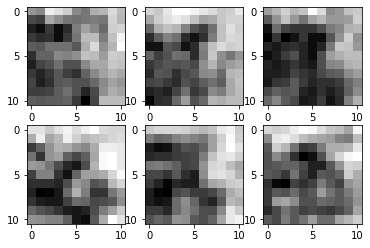

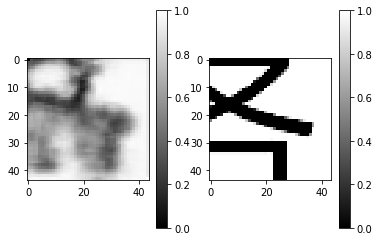

mse 0.1473127083075397
500/500 - 297s - loss: 0.1231 - mse: 0.1231 - val_loss: 0.1317 - val_mse: 0.1317
Epoch 23/200
500/500 - 297s - loss: 0.1237 - mse: 0.1237 - val_loss: 0.1300 - val_mse: 0.1300
Epoch 24/200
500/500 - 297s - loss: 0.1224 - mse: 0.1224 - val_loss: 0.1341 - val_mse: 0.1341
Epoch 25/200
500/500 - 296s - loss: 0.1222 - mse: 0.1222 - val_loss: 0.1301 - val_mse: 0.1301
Epoch 26/200
500/500 - 297s - loss: 0.1223 - mse: 0.1223 - val_loss: 0.1332 - val_mse: 0.1332
Epoch 27/200


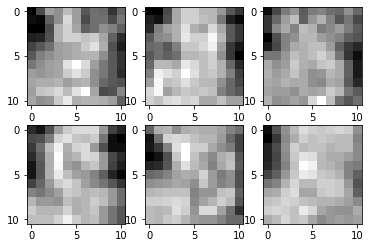

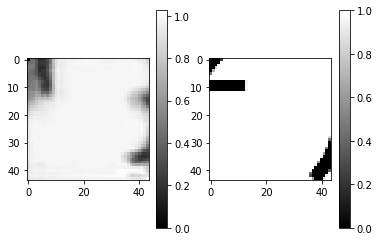

mse 0.04868120547596409
500/500 - 297s - loss: 0.1225 - mse: 0.1225 - val_loss: 0.1318 - val_mse: 0.1318
Epoch 28/200
500/500 - 297s - loss: 0.1220 - mse: 0.1220 - val_loss: 0.1309 - val_mse: 0.1309
Epoch 29/200
500/500 - 296s - loss: 0.1212 - mse: 0.1212 - val_loss: 0.1289 - val_mse: 0.1289
Epoch 30/200
500/500 - 296s - loss: 0.1216 - mse: 0.1216 - val_loss: 0.1329 - val_mse: 0.1329
Epoch 31/200
500/500 - 296s - loss: 0.1205 - mse: 0.1205 - val_loss: 0.1311 - val_mse: 0.1311
Epoch 32/200


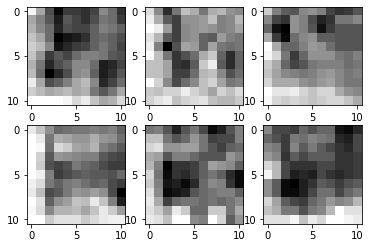

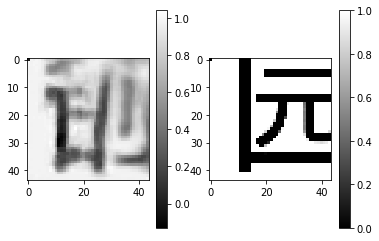

mse 0.15549533714549751
500/500 - 297s - loss: 0.1220 - mse: 0.1220 - val_loss: 0.1306 - val_mse: 0.1306
Epoch 33/200
500/500 - 296s - loss: 0.1200 - mse: 0.1200 - val_loss: 0.1317 - val_mse: 0.1317
Epoch 34/200
500/500 - 297s - loss: 0.1192 - mse: 0.1192 - val_loss: 0.1313 - val_mse: 0.1313
Epoch 35/200
500/500 - 296s - loss: 0.1193 - mse: 0.1193 - val_loss: 0.1303 - val_mse: 0.1303
Epoch 36/200
500/500 - 297s - loss: 0.1193 - mse: 0.1193 - val_loss: 0.1274 - val_mse: 0.1274
Epoch 37/200


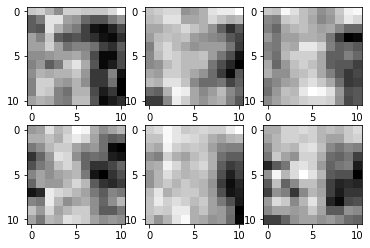

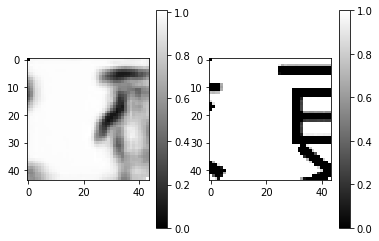

mse 0.10244651427204882
500/500 - 298s - loss: 0.1190 - mse: 0.1190 - val_loss: 0.1310 - val_mse: 0.1310
Epoch 38/200
500/500 - 297s - loss: 0.1198 - mse: 0.1198 - val_loss: 0.1317 - val_mse: 0.1317
Epoch 39/200
500/500 - 297s - loss: 0.1192 - mse: 0.1192 - val_loss: 0.1309 - val_mse: 0.1309
Epoch 40/200
500/500 - 297s - loss: 0.1190 - mse: 0.1190 - val_loss: 0.1312 - val_mse: 0.1312
Epoch 41/200
500/500 - 296s - loss: 0.1182 - mse: 0.1182 - val_loss: 0.1313 - val_mse: 0.1313
Epoch 42/200


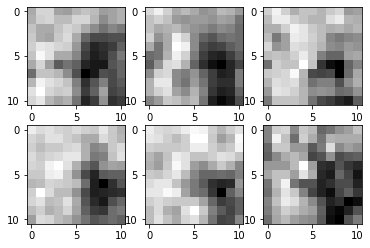

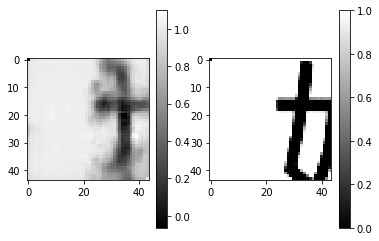

mse 0.10060182425124155
500/500 - 297s - loss: 0.1187 - mse: 0.1187 - val_loss: 0.1337 - val_mse: 0.1337
Epoch 43/200
500/500 - 297s - loss: 0.1188 - mse: 0.1188 - val_loss: 0.1311 - val_mse: 0.1311
Epoch 44/200
500/500 - 297s - loss: 0.1178 - mse: 0.1178 - val_loss: 0.1302 - val_mse: 0.1302
Epoch 45/200
500/500 - 296s - loss: 0.1184 - mse: 0.1184 - val_loss: 0.1302 - val_mse: 0.1302
Epoch 46/200
500/500 - 296s - loss: 0.1182 - mse: 0.1182 - val_loss: 0.1275 - val_mse: 0.1275
Epoch 47/200


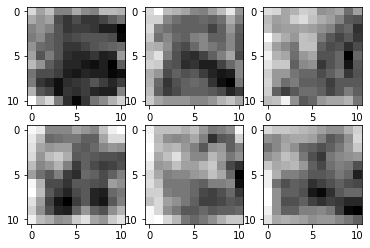

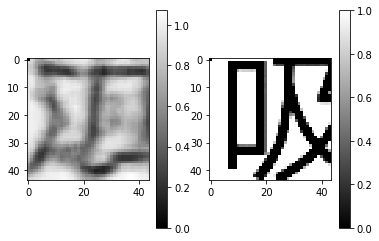

mse 0.23012157933442642
500/500 - 297s - loss: 0.1180 - mse: 0.1180 - val_loss: 0.1311 - val_mse: 0.1311
Epoch 48/200
500/500 - 296s - loss: 0.1178 - mse: 0.1178 - val_loss: 0.1309 - val_mse: 0.1309
Epoch 49/200
500/500 - 296s - loss: 0.1172 - mse: 0.1172 - val_loss: 0.1281 - val_mse: 0.1281
Epoch 50/200
500/500 - 296s - loss: 0.1168 - mse: 0.1168 - val_loss: 0.1266 - val_mse: 0.1266
Epoch 51/200
500/500 - 296s - loss: 0.1165 - mse: 0.1165 - val_loss: 0.1280 - val_mse: 0.1280
Epoch 52/200


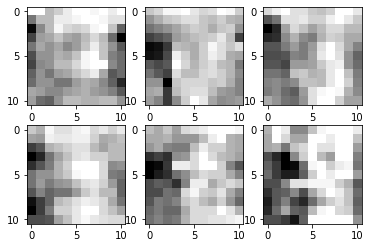

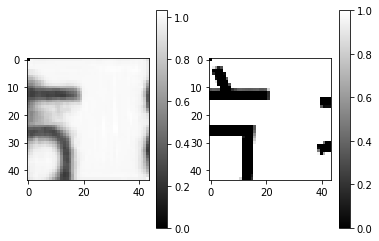

mse 0.061024389088850994
500/500 - 297s - loss: 0.1169 - mse: 0.1169 - val_loss: 0.1326 - val_mse: 0.1326
Epoch 53/200
500/500 - 297s - loss: 0.1167 - mse: 0.1167 - val_loss: 0.1324 - val_mse: 0.1324
Epoch 54/200
500/500 - 296s - loss: 0.1163 - mse: 0.1163 - val_loss: 0.1300 - val_mse: 0.1300
Epoch 55/200
500/500 - 296s - loss: 0.1165 - mse: 0.1165 - val_loss: 0.1317 - val_mse: 0.1317
Epoch 56/200
500/500 - 296s - loss: 0.1158 - mse: 0.1158 - val_loss: 0.1284 - val_mse: 0.1284
Epoch 57/200


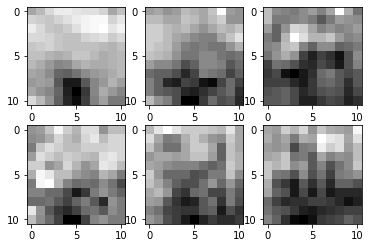

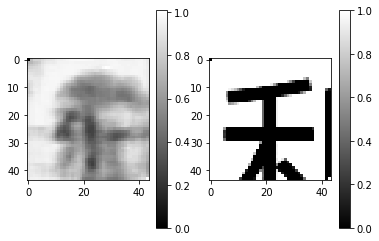

mse 0.14585067873267663
500/500 - 297s - loss: 0.1159 - mse: 0.1159 - val_loss: 0.1299 - val_mse: 0.1299
Epoch 58/200
500/500 - 296s - loss: 0.1161 - mse: 0.1161 - val_loss: 0.1291 - val_mse: 0.1291
Epoch 59/200
500/500 - 297s - loss: 0.1159 - mse: 0.1159 - val_loss: 0.1300 - val_mse: 0.1300
Epoch 60/200
500/500 - 296s - loss: 0.1158 - mse: 0.1158 - val_loss: 0.1282 - val_mse: 0.1282
Epoch 61/200
500/500 - 296s - loss: 0.1160 - mse: 0.1160 - val_loss: 0.1296 - val_mse: 0.1296
Epoch 62/200


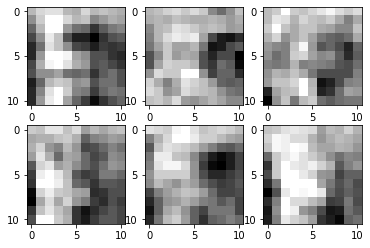

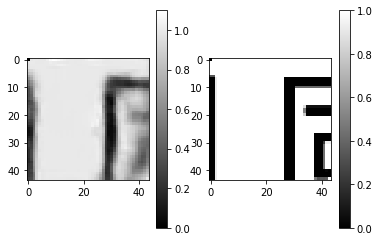

mse 0.06814248666818633
500/500 - 297s - loss: 0.1162 - mse: 0.1162 - val_loss: 0.1331 - val_mse: 0.1331
Epoch 63/200
500/500 - 296s - loss: 0.1150 - mse: 0.1150 - val_loss: 0.1291 - val_mse: 0.1291
Epoch 64/200
500/500 - 296s - loss: 0.1151 - mse: 0.1151 - val_loss: 0.1305 - val_mse: 0.1305
Epoch 65/200
500/500 - 296s - loss: 0.1154 - mse: 0.1154 - val_loss: 0.1298 - val_mse: 0.1298
Epoch 66/200
500/500 - 296s - loss: 0.1146 - mse: 0.1146 - val_loss: 0.1297 - val_mse: 0.1297
Epoch 67/200


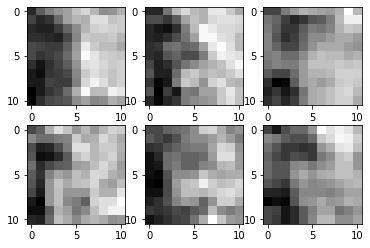

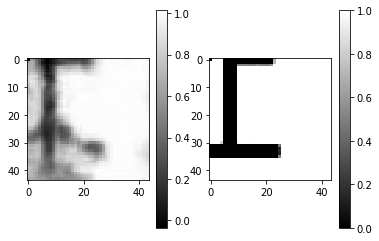

mse 0.0729945885649733
500/500 - 297s - loss: 0.1141 - mse: 0.1141 - val_loss: 0.1289 - val_mse: 0.1289
Epoch 68/200
500/500 - 296s - loss: 0.1148 - mse: 0.1148 - val_loss: 0.1297 - val_mse: 0.1297
Epoch 69/200
500/500 - 297s - loss: 0.1145 - mse: 0.1145 - val_loss: 0.1276 - val_mse: 0.1276
Epoch 70/200
500/500 - 296s - loss: 0.1142 - mse: 0.1142 - val_loss: 0.1299 - val_mse: 0.1299
Epoch 71/200
500/500 - 296s - loss: 0.1135 - mse: 0.1135 - val_loss: 0.1291 - val_mse: 0.1291
Epoch 72/200


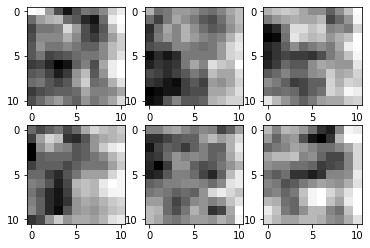

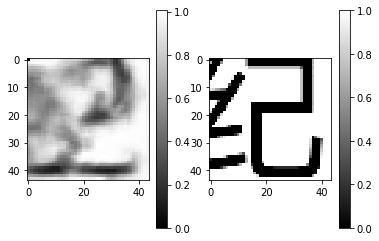

mse 0.17532462384250577
500/500 - 297s - loss: 0.1135 - mse: 0.1135 - val_loss: 0.1278 - val_mse: 0.1278
Epoch 73/200


In [0]:
#checkpoint_path = "training_16/cp-{epoch:02d}-{val_loss:.4f}.ckpt"
checkpoint_path = "/content/drive/My Drive/checkpoints/training_24/cp-{epoch:02d}-{val_loss:.4f}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
if os.path.exists(checkpoint_dir):
  model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))#,by_name=True)
  print("=======================================load weights!=======================================")
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,save_weights_only=True,monitor='val_loss')#,save_best_only=True,mode='min')
show_accuracy_callback = show_accuracy()
show_accuracy_callback.on_epoch_end(epoch=1)
model.fit_generator(train_generator,epochs=200,steps_per_epoch=500,validation_data=test_generator,validation_steps=50,validation_freq=1,verbose=2,callbacks=[cp_callback,show_accuracy_callback])


# 验证模型

In [0]:
def predict_pic(xpics,model):
  # xpic: array of 5 with size(22,52,1)
  picout = np.zeros((picsizex*enhance,picsizey*enhance),dtype=np.float32)
  piclayer = np.zeros((picsizex*enhance,picsizey*enhance),dtype=int)
  for posx in range(0,picsizex+1-datasizex):
    for posy in range(0,picsizey+1-datasizey):
      dataout = [pic[np.newaxis,posx:posx+datasizex,posy:posy+datasizey,:] for pic in xpics]
      pred = model.predict(dataout)
      picout[posx*enhance:(posx+datasizex)*enhance,posy*enhance:(posy+datasizey)*enhance] += pred[0,:,:,0]
      piclayer[posx*enhance:(posx+datasizex)*enhance,posy*enhance:(posy+datasizey)*enhance] += np.ones((datasizex*enhance,datasizey*enhance),dtype=int)
  picout /= piclayer
  return picout


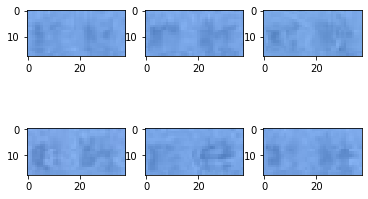

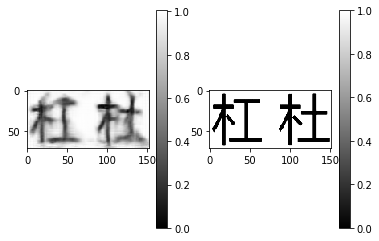

mse 0.07600276071673644


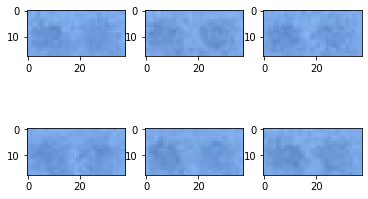

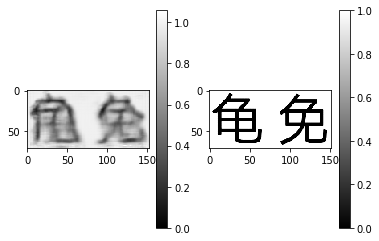

mse 0.10386644289364932


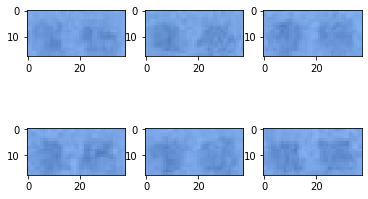

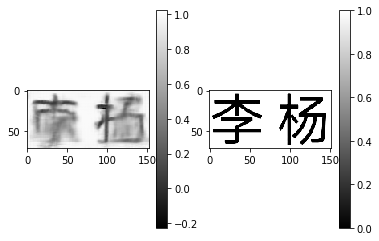

mse 0.10450961233969557


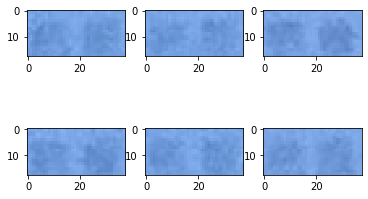

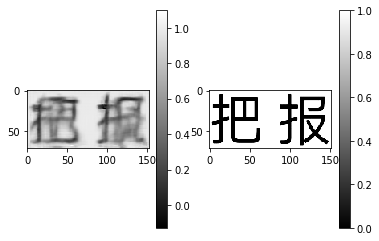

mse 0.09746674867389456


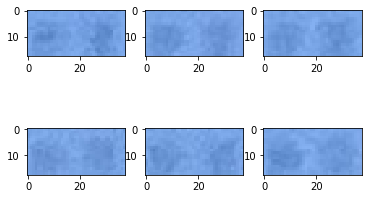

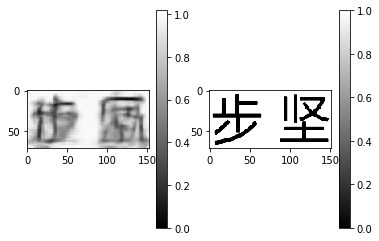

mse 0.11159514640855032


KeyboardInterrupt: ignored

In [0]:
import matplotlib
cmap = matplotlib.cm.gray 
cmap.set_bad(color='black')
for ti in range(10):    
  data,ans = next(test_pic_generators[0])



  pred = predict_pic(data,model)

  for i in range(6):
    plt.subplot(231+i)
    b,g,r = cv2.split(data[i])       # get b,g,r
    rgb_img = cv2.merge([r,g,b])     # switch it to rgb
    plt.imshow(rgb_img)

  plt.show()      
  pred[0,0]=0
  pred[-1,-1]=1
  ans[0,0]=0
  ans[-1,-1]=1
  plt.subplot(121)
  plt.imshow(pred,cmap=cmap)
  plt.colorbar()
  #ans = np.clip((ans-np.percentile(ans,10))/(np.percentile(ans,90)-np.percentile(ans,10)),0,1)
  plt.subplot(122)
  plt.imshow(ans,cmap=cmap)
  plt.colorbar()
  plt.show()
  #      print('psnr',peak_signal_noise_ratio(np.clip(pred[0,:,:,0],0,1),ans))
  #      print('ssim',structural_similarity(np.clip(pred[0,:,:,0],0,1),ans))
  print('mse',mean_squared_error(np.clip(pred,0,1),ans))
